<a href="https://colab.research.google.com/github/drhammed/GColab/blob/main/Akande_Vector_ML_AI_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install requests_cache
import pandas as pd
import requests_cache
#import pygbif 
import os, re, sys
import numpy as np
import matplotlib.pyplot as plt
import io
from scipy import stats
import statsmodels.formula.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


     |████████████████████████████████| 47 kB 2.6 MB/s 
     |████████████████████████████████| 138 kB 36.1 MB/s 
     |████████████████████████████████| 127 kB 41.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

parrot = pd.read_csv('https://raw.githubusercontent.com/drhammed/GColab/main/parrot_clean_df.csv', encoding='latin-1')


In [3]:
parrot.head()

,species,decimalLongitude,decimalLatitude,country
0,Psittacus erithacus,11.293967,4.173409,Cameroon
1,Psittacus erithacus,5.374550,6.292117,Nigeria
2,Psittacus erithacus,15.102933,0.956955,Congo
3,Psittacus erithacus,11.981012,-0.179144,Gabon
4,Psittacus erithacus,10.751233,-0.079009,Gabon


In [4]:
parrot.dtypes
parrot.select_dtypes("float64").head()

,decimalLongitude,decimalLatitude
0,11.293967,4.173409
1,5.374550,6.292117
2,15.102933,0.956955
3,11.981012,-0.179144
4,10.751233,-0.079009


*Create inputs and outpus directory to store data and results*

In [5]:
import os 
os.mkdir("inputs")
os.mkdir("outputs")

**Interface R with Python**

In [6]:
%load_ext rpy2.ipython

In [7]:
%%R 
install.packages("rgdal", dependency = True)


library('rgdal')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependency ‘sp’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/sp_1.4-6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1423843 bytes (1.4 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]:

In [8]:
%%R 
install.packages('dismo', dependency = True)

 
library('dismo')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘raster’, ‘terra’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/raster_3.5-15.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 580594 bytes (566 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [9]:
%%R

install.packages("maptools")
library("maptools")


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/maptools_1.1-3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1643257 bytes (1.6 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

**Select the species data needed for modelling**

In [10]:
parrot_df = parrot[['species', 'decimalLatitude', 'decimalLongitude']]

In [11]:

print(parrot_df.species.isnull().value_counts())
print(parrot_df.decimalLatitude.isnull().value_counts())
print(parrot_df.decimalLongitude.isnull().value_counts())


False    1499
Name: species, dtype: int64
False    1499
Name: decimalLatitude, dtype: int64
False    1499
Name: decimalLongitude, dtype: int64


In [12]:
%R -i parrot_df #convert python object to R
%R head(parrot_df)

,species,decimalLatitude,decimalLongitude
0,Psittacus erithacus,4.173409,11.293967
1,Psittacus erithacus,6.292117,5.374550
2,Psittacus erithacus,0.956955,15.102933
3,Psittacus erithacus,-0.179144,11.981012
4,Psittacus erithacus,-0.079009,10.751233
5,Psittacus erithacus,0.397746,30.407880


**Removing the NAs- Meanwhile, I have preprocessed the data in R to clean it. So no NAs are here, but the code to remove NAs is this**

In [ ]:
#parrot_df_clean = parrot_df.dropna(subset=["decimalLatitude"]) #Deletes records with NAs

In [ ]:
#print(parrot_df_clean.species.isnull().value_counts())
#print(parrot_df_clean.decimalLatitude.isnull().value_counts())
#print(parrot_df_clean.decimalLongitude.isnull().value_counts())

In [13]:
isDuplicate = parrot_df.duplicated(keep = 'first')
print(isDuplicate.head())
isDuplicate.value_counts()

0    False
1    False
2    False
3    False
4    False
dtype: bool


False    1499
dtype: int64

In [ ]:
# In the instance of duplicates, one can remove them like this

#parrot_ndp = parrot_df_clean.drop_duplicates(subset=['species', 'decimalLatitude', 'decimalLongitude'], keep='first')

In [ ]:
#%%R library('raster')

***Set Geographic extent to Study area***

In [216]:
%%R 

#geographic extent

max.lat <- ceiling(max(parrot_df$decimalLatitude))
min.lat <- floor(min(parrot_df$decimalLatitude))
max.lon <- ceiling(max(parrot_df$decimalLongitude))
min.lon <- floor(min(parrot_df$decimalLongitude))
ext <- extent(x = c(min.lon, max.lon, min.lat, max.lat))

*Africa study extent*

In [14]:
%%R 
xmn <- -25.4
xmx <- 63.5
ymn <- -47
ymx <- 37.6
ext <- extent(x = c(xmn, xmx, ymn, ymx))


In [15]:
%%R

sp <- data.frame(matrix(ncol = 2, nrow = length(parrot_df$decimalLongitude)))
sp[,1] <- parrot_df$decimalLongitude
sp[,2] <- parrot_df$decimalLatitude
sp <- unique(sp) # get species with duplicates
sp <- sp[complete.cases(sp),] # remove NAs
colnames(sp) <- c('lon','lat')

***Download bioclim data***

In [16]:
%%R

if(!dir.exists("bioclim_data")){ dir.create("bioclim_data", recursive = TRUE)}

In [17]:
%%R

sp <- sp[which(sp$lon>=ext[1] & sp$lon<=ext[2]),] # remove presences beyond extent
sp <- sp[which(sp$lat>=ext[3] & sp$lat<=ext[4]),] # remove presences beyond extent

In [18]:
%%R

# Download clim data from the dismo package 

clim_data <- getData(name = "worldclim", var = "bio", res = 2.5, path = "bioclim_data/",download = T)


R[write to console]: trying URL 'https://biogeo.ucdavis.edu/data/climate/worldclim/1_4/grid/cur/bio_2-5m_bil.zip'

R[write to console]: Content type 'application/zip'
R[write to console]:  length 129319755 bytes (123.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [32]:
%%R 

## Crop to study area

clim_fc  <- crop(clim_data, ext)

In [33]:
%%R 
predictors <- stack(clim_fc)

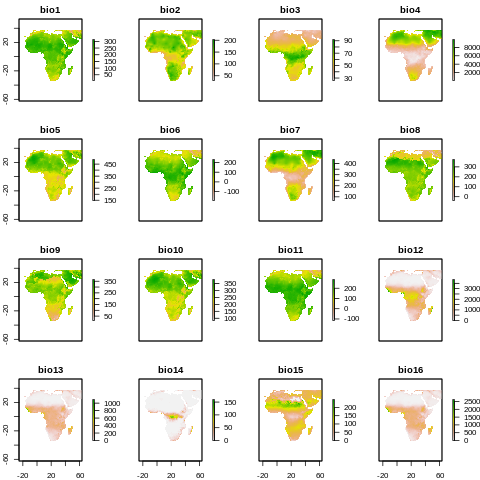

In [34]:
%%R 
plot(predictors)

In [35]:
%%R

for (i in c(1:19)){
 writeRaster(clim_fc[[i]], paste('bioclim_data/bio', i, sep = ''),
            format="ascii", overwrite=TRUE)
}

In [36]:
%%R

if(!dir.exists("clim_pred")){ dir.create("clim_pred", recursive = TRUE)}

***Predictors to be used- from worldclim (see above)***

BIO7 = Temperature Annual Range,
BIO15 = Precipitation Seasonality (Coefficient of Variation),
BIO11 = Mean Temperature of Coldest Quarter,
BIO19 = Precipitation of Coldest Quarter,
BIO10 = Mean Temperature of Warmest Quarter,
BIO8 = Mean Temperature of Wettest Quarter,
BIO9 = Mean Temperature of Driest Quarter

In [ ]:
#%%R

#predictors to use= "bio7","bio8", "bio9","bio10", "bio11", "bio15", "bio19"

#writeRaster(clim_fc$bio19, paste('clim_pred/bio19'), format = "ascii", overwrite=TRUE)

**Generate Background Points**

In [51]:
%%R 

# Using the bioclim data files for sampling resolution
# sample background points and increase the extent of sample slightly

bg <- randomPoints(clim_fc[[1]], n= nrow(sp)*2, ext=ext, extf = 1.25) 
colnames(bg) <- c('lon','lat')

# Join background data with presences

train <- rbind(sp, bg)  

# create a col of ones and zeros

pa_train <- c(rep(1, nrow(sp)), rep(0, nrow(bg))) 

# Store in a dataframe

train <- data.frame(cbind(CLASS=pa_train, train))

In [52]:
%%R

# create spatial points
crs <- crs(clim_fc[[1]])
train <- train[sample(nrow(train)),]
class.pa <- data.frame(train[,1])
colnames(class.pa) <- 'CLASS'
dataMap.parrot  <- SpatialPointsDataFrame(train[,c(2,3)], class.pa,
                                      proj4string =crs)

In [53]:
%%R

dataMap.parrot

class       : SpatialPointsDataFrame 
features    : 4497 
extent      : -25.10417, 63.47917, -34.39583, 37.5625  (xmin, xmax, ymin, ymax)
crs         : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
variables   : 1
names       : CLASS 
min values  :     0 
max values  :     1 


In [54]:
%%R  

if(!dir.exists("data")){ dir.create("data", recursive = TRUE)}

In [55]:
%%R

# write as shp
writeOGR(dataMap.parrot, 'data/parrot.shp','parrot', overwrite= T, driver='ESRI Shapefile')


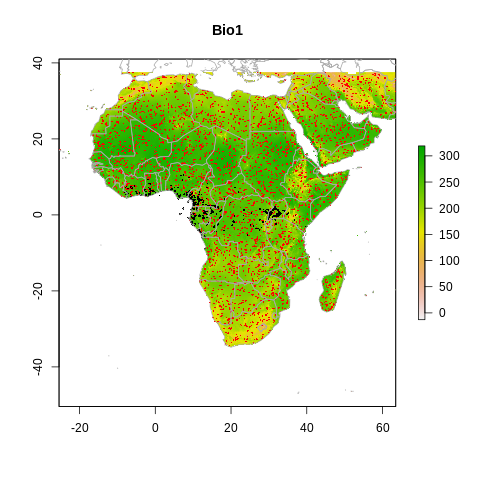

In [56]:
%%R

# plot our points- presence in black and absence in red

data(wrld_simpl)
plot(clim_fc[[1]], main='Bio1')
points(bg, col='red', pch = 16,cex=.3)
points(sp, col='black', pch = 16,cex=.3)
plot(wrld_simpl, add=TRUE, border='dark grey')

In [46]:
!pip install geopandas
import geopandas as gpd
import shutil
import glob

     |████████████████████████████████| 1.0 MB 24.1 MB/s 
     |████████████████████████████████| 6.3 MB 52.4 MB/s 
     |████████████████████████████████| 16.7 MB 234 kB/s 


In [60]:
pa = gpd.GeoDataFrame.from_file("data/parrot.shp")
pa.sample(5) # five GeoDataFrame for the species

,CLASS,geometry
1930,0.0,POINT (33.89583 -15.10417)
1452,1.0,POINT (30.08941 0.18146)
912,1.0,POINT (50.47917 9.89583)
1712,0.0,POINT (44.14583 12.64583)
233,0.0,POINT (26.81250 -32.68750)


**Clean the shapefile containing the species**

In [61]:
print("number of duplicates: ", pa.duplicated(subset='geometry', keep='first').sum())
print("number of NA's: ", pa['geometry'].isna().sum())
print("Coordinate reference system is: {}".format(pa.crs))
print("{} observations with {} columns".format(*pa.shape))

number of duplicates:  0
number of NA's:  0
Coordinate reference system is: epsg:4326
4497 observations with 2 columns


**Fit Machine Learning classifiers** 

In [ ]:
#%%R

#predictors to use= "bio7","bio8", "bio9","bio10", "bio11", "bio15", "bio19"



In [64]:
%%R

bio7 = clim_fc$bio7
bio8 = clim_fc$bio8 
bio9 = clim_fc$bio9
bio10 = clim_fc$bio10 
bio11 = clim_fc$bio11
bio15 = clim_fc$bio15
bio19 = clim_fc$bio19


In [65]:
%%R

bio7[is.na(bio7)] <- 0
bio8[is.na(bio8)] <- 0
bio9[is.na(bio9)] <- 0
bio10[is.na(bio10)] <- 0
bio11[is.na(bio11)] <- 0
bio15[is.na(bio15)] <- 0
bio19[is.na(bio19)] <- 0

In [66]:
%%R

writeRaster(bio7, paste('clim_pred/bio7'), format = "GTiff", overwrite=TRUE)
writeRaster(bio8, paste('clim_pred/bio8'), format = "GTiff", overwrite=TRUE)
writeRaster(bio9, paste('clim_pred/bio9'), format = "GTiff", overwrite=TRUE)
writeRaster(bio10, paste('clim_pred/bio10'), format = "GTiff", overwrite=TRUE)
writeRaster(bio11, paste('clim_pred/bio11'), format = "GTiff", overwrite=TRUE)
writeRaster(bio15, paste('clim_pred/bio15'), format = "GTiff", overwrite=TRUE)
writeRaster(bio19, paste('clim_pred/bio19'), format = "GTiff", overwrite=TRUE)


In [67]:
explanatory_rasters=sorted(glob.glob(
   'clim_pred/*.tif'))

 #check number of features 
print('\nThere are', len(explanatory_rasters), 'raster features.')


There are 7 raster features.


In [68]:
!pip install pyimpute
from pyimpute import load_training_vector
from pyimpute import load_targets


     |████████████████████████████████| 19.3 MB 260 kB/s 
     |████████████████████████████████| 130 kB 41.7 MB/s 
  Created wheel for pyimpute: filename=pyimpute-0.3-py3-none-any.whl size=6044 sha256=3902679cd3d7abe302aa94f2f74ca5d9a885cac9e716c018f13c2d6b7c49d5d8
  Stored in directory: /root/.cache/pip/wheels/cd/7a/bc/e4e769aa6d7ecdb00cc5579f9d3ace47ac430c99f4665387c5
Successfully built pyimpute


In [69]:
train_xs, train_y = load_training_vector(pa, explanatory_rasters, response_field='CLASS')
target_xs, raster_info = load_targets(explanatory_rasters)
train_xs.shape, train_y.shape # check shape, does it match the size above of the observations?

((4497, 7), (4497,))

*Train individual scikit-learn classifier*

In [74]:
#load the libs 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from pyimpute import evaluate_clf

***Random Forest***

In [75]:

clf_rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
clf_rf.fit(train_xs, train_y)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

In [76]:
#Evalute rf classifier using several validation metrics

evaluate_clf(clf_rf, train_xs, train_y)

Accuracy Score: 0.604713

Classification report
              precision    recall  f1-score   support

         0.0       0.67      0.82      0.73      1506
         1.0       0.32      0.17      0.22       743

    accuracy                           0.60      2249
   macro avg       0.49      0.50      0.48      2249
weighted avg       0.55      0.60      0.57      2249


Confussion matrix
[[1232  274]
 [ 615  128]]

Feature importances
                   0: 13.0

                   1: 13.0

                   2: 15.2

                   3: 15.1

                   4: 14.9

                   5: 14.1

                   6: 14.8



In [85]:
 os.mkdir('outputs/rf')

In [87]:
#Make predictions, outputing geotiffs

from pyimpute import impute
from sklearn import model_selection

impute(target_xs, clf_rf, raster_info, outdir='outputs/rf',
        linechunk=400, class_prob=True, certainty=True)



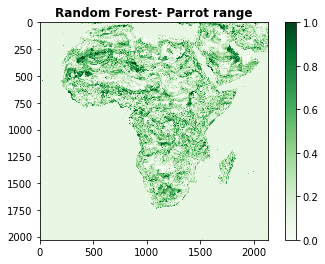

In [111]:
from pylab import plt
import rasterio

# define spatial plotter
def plotit(x, title, cmap="Blues"):
    plt.imshow(x, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    plt.title(title, fontweight = 'bold')

distr_rf = rasterio.open("outputs/rf/probability_1.0.tif").read(1)
plotit(distr_rf, "Random Forest- Parrot range", cmap="Greens")

***ExtraTreesClassifier***

In [106]:
clf_et = ExtraTreesClassifier(n_estimators=10, n_jobs=-1)
clf_et.fit(train_xs, train_y)

ExtraTreesClassifier(n_estimators=10, n_jobs=-1)

In [107]:
#Evalute et classifier using several validation metrics

evaluate_clf(clf_et, train_xs, train_y)

Accuracy Score: 0.605158

Classification report
              precision    recall  f1-score   support

         0.0       0.67      0.82      0.73      1498
         1.0       0.33      0.18      0.23       751

    accuracy                           0.61      2249
   macro avg       0.50      0.50      0.48      2249
weighted avg       0.55      0.61      0.57      2249


Confussion matrix
[[1228  270]
 [ 618  133]]

Feature importances
                   0: 14.5

                   1: 13.6

                   2: 15.0

                   3: 14.0

                   4: 15.6

                   5: 14.1

                   6: 13.2



In [ ]:
#if not os.path.exists('outputs'):
 #   os.makedirs('outputs')

In [108]:
os.mkdir('outputs/et')

In [109]:
#Make predictions, outputing geotiffs

from pyimpute import impute
from sklearn import model_selection

impute(target_xs, clf_et, raster_info, outdir='outputs/et',
        linechunk=400, class_prob=True, certainty=True)



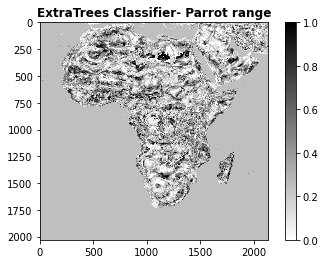

In [120]:
from pylab import plt
import rasterio

# define spatial plotter
def plotit(x, title, cmap="Blues"):
    plt.imshow(x, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    plt.title(title, fontweight = 'bold')

distr_et = rasterio.open("outputs/et/probability_1.0.tif").read(1)
plotit(distr_et, "ExtraTrees Classifier- Parrot range", cmap="binary")

***XGBClassifier***

In [116]:
clf_xgb = XGBClassifier(n_estimators=10, n_jobs=-1)
clf_xgb.fit(train_xs, train_y)

XGBClassifier(n_estimators=10, n_jobs=-1)

In [117]:
#Evalute xgb classifier using several validation metrics

evaluate_clf(clf_xgb, train_xs, train_y)

Accuracy Score: 0.655847

Classification report
              precision    recall  f1-score   support

         0.0       0.66      0.99      0.79      1487
         1.0       0.30      0.01      0.02       762

    accuracy                           0.66      2249
   macro avg       0.48      0.50      0.41      2249
weighted avg       0.54      0.66      0.53      2249


Confussion matrix
[[1466   21]
 [ 753    9]]

Feature importances
                   0: 7.3

                   1: 13.7

                   2: 16.8

                   3: 12.6

                   4: 15.9

                   5: 15.7

                   6: 18.0



In [118]:
os.mkdir('outputs/xgb')

In [119]:
#Make predictions, outputing geotiffs

from pyimpute import impute
from sklearn import model_selection

impute(target_xs, clf_xgb, raster_info, outdir='outputs/xgb',
        linechunk=400, class_prob=True, certainty=True)

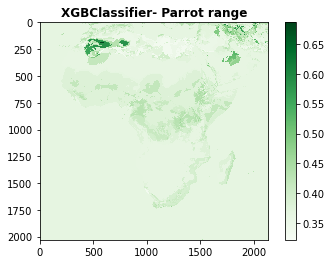

In [122]:
from pylab import plt
import rasterio

# define spatial plotter
def plotit(x, title, cmap="Blues"):
    plt.imshow(x, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    plt.title(title, fontweight = 'bold')

distr_xgb = rasterio.open("outputs/xgb/probability_1.0.tif").read(1)
plotit(distr_xgb, "XGBClassifier- Parrot range", cmap="Greens")

***LGBMClassifier***

In [123]:
clf_lgbm = LGBMClassifier(n_estimators=10, n_jobs=-1)
clf_lgbm.fit(train_xs, train_y)

LGBMClassifier(n_estimators=10)

In [124]:
#Evalute lgbm classifier using several validation metrics

evaluate_clf(clf_lgbm, train_xs, train_y)

Accuracy Score: 0.654068

Classification report
              precision    recall  f1-score   support

         0.0       0.66      0.98      0.79      1479
         1.0       0.41      0.02      0.04       770

    accuracy                           0.65      2249
   macro avg       0.53      0.50      0.42      2249
weighted avg       0.57      0.65      0.53      2249


Confussion matrix
[[1453   26]
 [ 752   18]]

Feature importances
                   0: 4200

                   1: 3900

                   2: 4200

                   3: 4400

                   4: 3000

                   5: 5100

                   6: 5200



In [125]:
os.mkdir('outputs/lgbm')

In [126]:
#Make predictions, outputing geotiffs

from pyimpute import impute
from sklearn import model_selection

impute(target_xs, clf_lgbm, raster_info, outdir='outputs/lgbm',
        linechunk=400, class_prob=True, certainty=True)

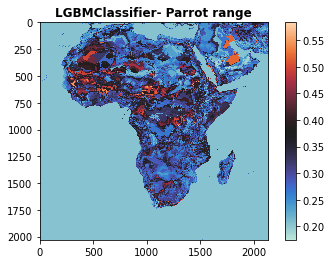

In [128]:
from pylab import plt
import rasterio

# define spatial plotter
def plotit(x, title, cmap="Blues"):
    plt.imshow(x, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    plt.title(title, fontweight = 'bold')

distr_lgbm = rasterio.open("outputs/lgbm/probability_1.0.tif").read(1)
plotit(distr_lgbm, "LGBMClassifier- Parrot range", cmap="icefire")

***AdaBoost Classifier***

In [130]:
clf_ada = AdaBoostClassifier(n_estimators=10)
clf_ada.fit(train_xs, train_y)

AdaBoostClassifier(n_estimators=10)

In [131]:
#Evalute ada classifier using several validation metrics

evaluate_clf(clf_ada, train_xs, train_y)

Accuracy Score: 0.657626

Classification report
              precision    recall  f1-score   support

         0.0       0.66      0.99      0.79      1483
         1.0       0.44      0.02      0.04       766

    accuracy                           0.66      2249
   macro avg       0.55      0.50      0.41      2249
weighted avg       0.59      0.66      0.53      2249


Confussion matrix
[[1464   19]
 [ 751   15]]

Feature importances
                   0: 0.0

                   1: 0.0

                   2: 10.0

                   3: 30.0

                   4: 10.0

                   5: 30.0

                   6: 20.0



In [132]:
os.mkdir('outputs/ada')

In [133]:
#Make predictions, outputing geotiffs

from pyimpute import impute
from sklearn import model_selection

impute(target_xs, clf_ada, raster_info, outdir='outputs/ada',
        linechunk=400, class_prob=True, certainty=True)

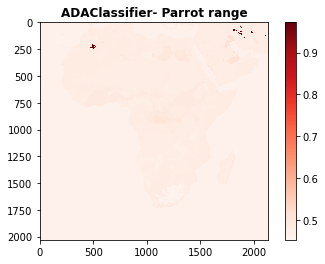

In [138]:
from pylab import plt
import rasterio

# define spatial plotter
def plotit(x, title, cmap="Blues"):
    plt.imshow(x, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    plt.title(title, fontweight = 'bold')

distr_ada = rasterio.open("outputs/ada/probability_1.0.tif").read(1)
plotit(distr_ada, "ADAClassifier- Parrot range", cmap="Reds")

***Load and Run all the classifiers together, then average them to produce a single map***

In [140]:
os.mkdir('outputs_all')

In [143]:
# import machine learning classifiers

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier

CLASS_MAP = {
    'rf': (RandomForestClassifier()),
    'et': (ExtraTreesClassifier()),
    'xgb': (XGBClassifier()),
    'lgbm': (LGBMClassifier()),
    'ada': (AdaBoostClassifier())
    }


from pyimpute import impute
from sklearn import model_selection
# model fitting and spatial range prediction
for name, (model) in CLASS_MAP.items():
    # cross validation for accuracy scores (displayed as a percentage)
    k = 5 # k-fold
    kf = model_selection.KFold(n_splits=k)
    accuracy_scores = model_selection.cross_val_score(model, train_xs, train_y, cv=kf, scoring='accuracy')
    print(name + " %d-fold Cross Validation Accuracy: %0.2f (+/- %0.2f)"
          % (k, accuracy_scores.mean() * 100, accuracy_scores.std() * 200))
    
    # spatial prediction
    model.fit(train_xs, train_y)
    os.mkdir('outputs_all/' + name + '-images')
    impute(target_xs, model, raster_info, outdir='outputs_all/' + name + '-images',
           class_prob=True, certainty=True)

rf 5-fold Cross Validation Accuracy: 61.35 (+/- 3.93)
et 5-fold Cross Validation Accuracy: 60.42 (+/- 4.44)
xgb 5-fold Cross Validation Accuracy: 65.93 (+/- 3.22)
lgbm 5-fold Cross Validation Accuracy: 63.33 (+/- 3.91)
ada 5-fold Cross Validation Accuracy: 66.22 (+/- 3.25)


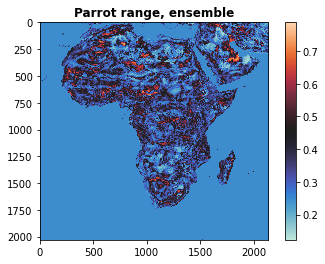

In [149]:
from pylab import plt
# define spatial plotter
def plotit(x, title, cmap="Blues"):
    plt.imshow(x, cmap=cmap, interpolation='nearest')
    plt.colorbar()
    plt.title(title, fontweight = 'bold')

import rasterio
distr_rf = rasterio.open("outputs_all/rf-images/probability_1.0.tif").read(1)
distr_et = rasterio.open("outputs_all/et-images/probability_1.0.tif").read(1)
distr_xgb =  rasterio.open("outputs_all/xgb-images/probability_1.0.tif").read(1)
distr_lgbm =  rasterio.open("outputs_all/lgbm-images/probability_1.0.tif").read(1)
distr_ada =  rasterio.open("outputs_all/ada-images/probability_1.0.tif").read(1)
distr_averaged = (distr_rf + distr_et + distr_xgb + distr_lgbm+distr_ada)/5  

plotit(distr_averaged, "Parrot range, ensemble", cmap="icefire")

***Zoom in to the study area and plot the suitability.***

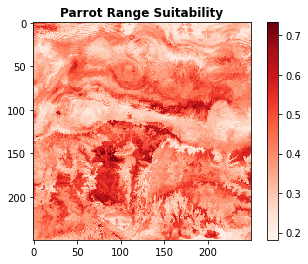

In [150]:
plotit(distr_averaged[500:750, 500:750], "Parrot Range Suitability", cmap="Reds")